In [1]:
from google.colab import files
uploaded = files.upload()

Saving Amazon Sales data.csv to Amazon Sales data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('Amazon Sales data.csv')

In [6]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [8]:
data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

Changing Data Type to date time format for order and ship dates

In [11]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

For convenience all object types are converted into string

In [13]:
data['Region'] = data['Region'].astype(str)
data['Country'] = data['Country'].astype(str)
data['Item Type'] = data['Item Type'].astype(str)
data['Sales Channel'] = data['Sales Channel'].astype(str)
data['Order Priority'] = data['Order Priority'].astype(str)

In [14]:
data[['Units Sold', 'Unit Price',	'Unit Cost', 'Total Revenue', 'Total Cost',	'Total Profit']].describe()

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [15]:
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year
data['Order Date MonthYear'] = data['Order Date'].dt.strftime('%Y-%m')
data = data.drop(columns=['Order Date'])

In [16]:
df = data

In [17]:
df.isnull().sum()

,0
Region,0
Country,0
Item Type,0
Sales Channel,0
Order Priority,0
Order ID,0
Ship Date,0
Units Sold,0
Unit Price,0
Unit Cost,0


Thank god no null values is there

In [18]:
pd.set_option('display.max_columns', None)
df['Country'].value_counts()

,count
Country,
The Gambia,4
Sierra Leone,3
Sao Tome and Principe,3
Mexico,3
Australia,3
...,...
Comoros,1
Iceland,1
Macedonia,1


In [19]:
country_names=df['Country'].value_counts().index
country_val=df['Country'].value_counts().values

# Top 20 Countries

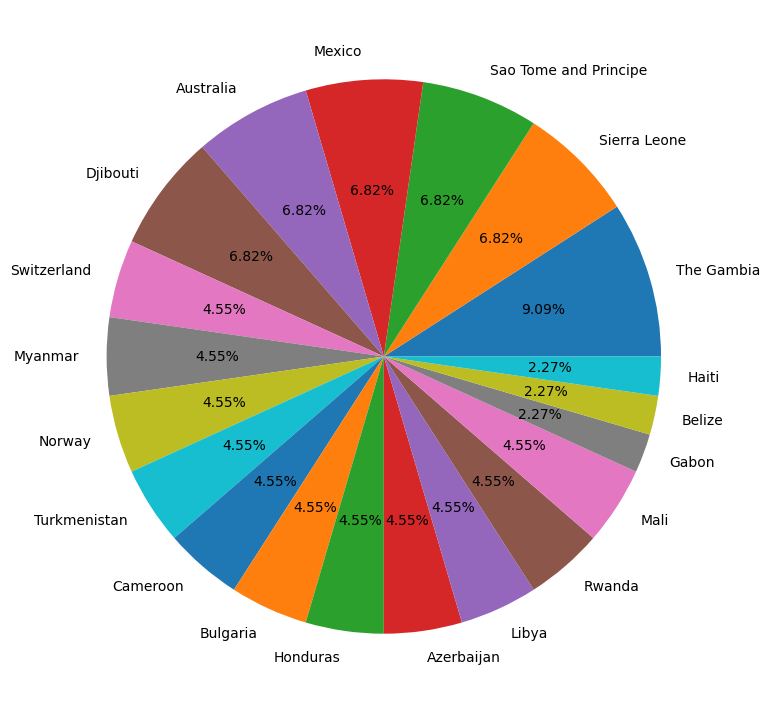

In [20]:
country_names = df.Country.value_counts().index
country_val = df.Country.value_counts().values

fig,ax = plt.subplots(figsize=(9,9))
ax.pie(country_val[:20],labels=country_names[:20],autopct='%1.2f%%')
plt.show()

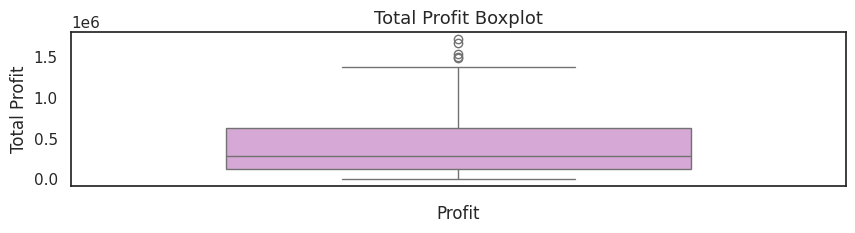

In [21]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(data['Total Profit'], color="plum", width=.6)
plt.title('Total Profit Boxplot', fontsize=13)
plt.xlabel('Profit')
plt.show()

In [22]:
def detect_outliers(dataframe, column):
    threshold = 2     ## 2nd standard deviation
    mean = np.mean(column)
    std = np.std(column)
    outliers = []

    for i, value in enumerate(column):
        z_score = (value - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)
            print(dataframe.loc[i])

    return outliers

In [23]:
outliers = detect_outliers(df, df["Total Profit"])

Region                  Central America and the Caribbean
Country                                          Honduras
Item Type                                       Household
Sales Channel                                     Offline
Order Priority                                          H
Order ID                                        522840487
Ship Date                             2017-02-13 00:00:00
Units Sold                                           8974
Unit Price                                         668.27
Unit Cost                                          502.54
Total Revenue                                  5997054.98
Total Cost                                     4509793.96
Total Profit                                   1487261.02
Order Month                                             2
Order Year                                           2017
Order Date MonthYear                              2017-02
Name: 13, dtype: object
Region                               Europe
Coun

In [24]:
print(outliers)

[13, 30, 33, 46, 74, 79, 93]


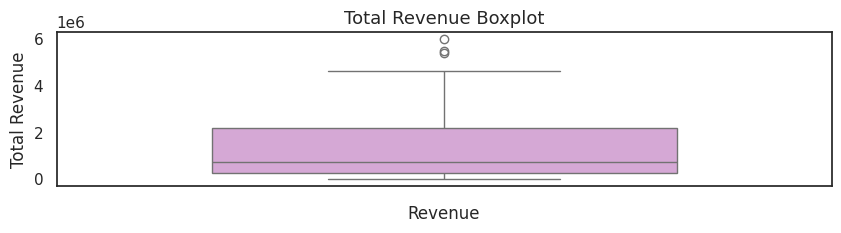

In [25]:
sns.set(style='white')
ax = plt.subplots(figsize=(10, 2))
sns.boxplot(data['Total Revenue'], color="plum", width=.6)

plt.title('Total Revenue Boxplot', fontsize=13)
plt.xlabel('Revenue')
plt.show()

In [26]:
outliers = detect_outliers(df, df["Total Revenue"])

Region                  Central America and the Caribbean
Country                                          Honduras
Item Type                                       Household
Sales Channel                                     Offline
Order Priority                                          H
Order ID                                        522840487
Ship Date                             2017-02-13 00:00:00
Units Sold                                           8974
Unit Price                                         668.27
Unit Cost                                          502.54
Total Revenue                                  5997054.98
Total Cost                                     4509793.96
Total Profit                                   1487261.02
Order Month                                             2
Order Year                                           2017
Order Date MonthYear                              2017-02
Name: 13, dtype: object
Region                                 Asia
Coun

In [27]:
list_length = len(outliers)
print("The list has", list_length, "outliers in Total Revenue column of dataframe data ")

The list has 6 outliers in Total Revenue column of dataframe data 


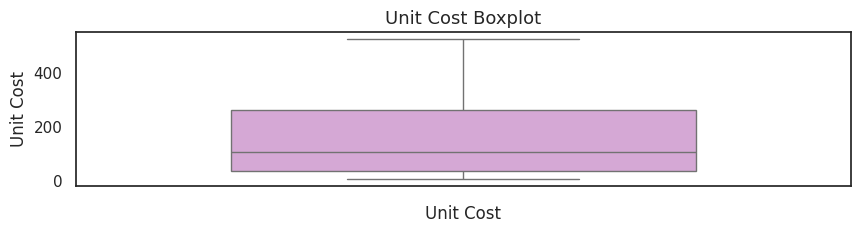

In [28]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(data['Unit Cost'], color="plum", width=.6)
plt.title('Unit Cost Boxplot', fontsize=13)
plt.xlabel('Unit Cost')
plt.show()

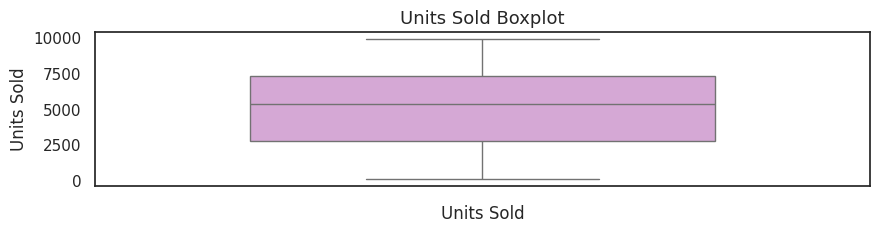

In [29]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(10, 2))
sns.boxplot(data['Units Sold'], color="plum", width=.6)

plt.title('Units Sold Boxplot', fontsize=13)
plt.xlabel('Units Sold')
plt.show()

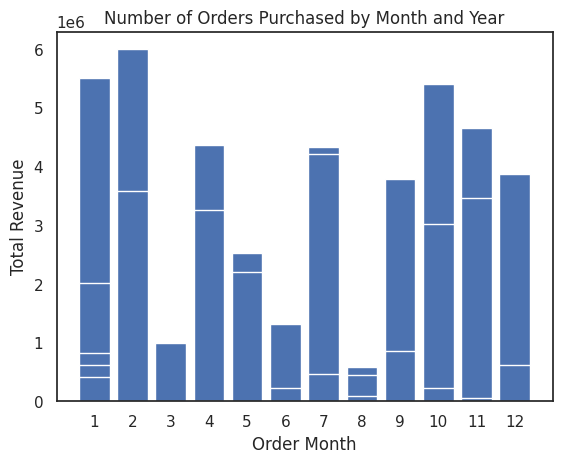

In [30]:
plt.bar(df['Order Month'], df['Total Revenue'])
plt.title('Number of Orders Purchased by Month and Year')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.xlabel('Order Month')
plt.ylabel('Total Revenue')
plt.show()

Text(0.5, 1.0, 'Profit per year')

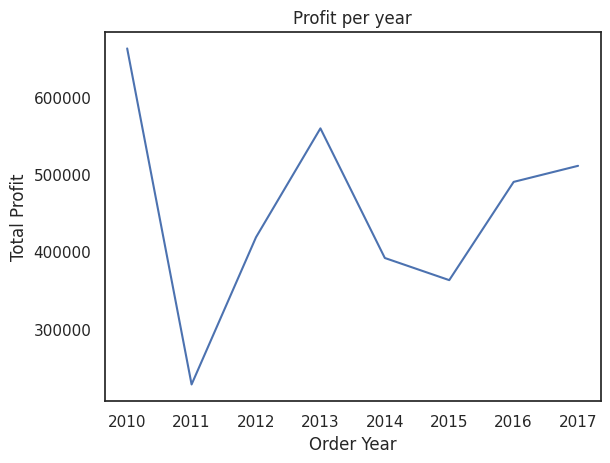

In [31]:
df.groupby('Order Year')['Total Profit'].mean().plot()
plt.xlabel('Order Year')
plt.ylabel('Total Profit')
plt.title('Profit per year')

In [32]:
import plotly.express as px
revenue_by_category = df.groupby('Item Type')['Total Revenue'].sum().reset_index()
revenue_by_category = revenue_by_category.sort_values(by='Total Revenue', ascending=False)
fig = px.funnel(revenue_by_category, x='Total Revenue', y='Item Type', title='Revenue by Item Type')
fig.show()


In [33]:
profit_by_category = df.groupby('Item Type')['Total Profit'].sum().reset_index()
profit_by_category = profit_by_category.sort_values(by='Total Profit', ascending=False)
fig = px.funnel(profit_by_category, x='Total Profit', y='Item Type', title='Profit by Item Type')
fig.show()


In [34]:
print(df[['Total Revenue', 'Total Cost', 'Total Profit']].corr())

               Total Revenue  Total Cost  Total Profit
Total Revenue       1.000000    0.983928      0.897327
Total Cost          0.983928    1.000000      0.804091
Total Profit        0.897327    0.804091      1.000000


In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Item Type"] = le.fit_transform(df["Item Type"])
df["Sales Channel"] = le.fit_transform(df["Sales Channel"])
df["Order Priority"] = le.fit_transform(df["Order Priority"])

In [36]:
df = df.drop("Region", axis=1)
df = df.drop("Country", axis=1)
df = df.drop("Order Date MonthYear", axis=1)
df = df.drop("Order ID", axis=1)
df = df.drop("Ship Date", axis=1)

In [37]:
df.head()

,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year
0,0,0,1,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5,2010
1,2,1,0,2804,205.70,117.11,576782.80,328376.44,248406.36,8,2012
2,8,0,2,1779,651.21,524.96,1158502.59,933903.84,224598.75,5,2014
3,5,1,0,8102,9.33,6.92,75591.66,56065.84,19525.82,6,2014
4,8,0,2,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2,2013


In [38]:
df_auto_ml = df

In [39]:
!pip install --pre pycaret

In [40]:
from pycaret.regression import *

In [41]:
reg = setup(data=df_auto_ml,target='Total Profit')

,Description,Value
0,Session id,2457
1,Target,Total Profit
2,Target type,Regression
3,Original data shape,"(100, 11)"
4,Transformed data shape,"(100, 11)"
5,Transformed train set shape,"(70, 11)"
6,Transformed test set shape,"(30, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [42]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0557,0.0081,0.0830,1.0000,0.0000,0.0000,0.6840
ridge,Ridge Regression,0.0555,0.0080,0.0829,1.0000,0.0000,0.0000,0.0270
lar,Least Angle Regression,0.0563,0.0082,0.0840,1.0000,0.0000,0.0000,0.0470
llar,Lasso Least Angle Regression,0.0456,0.0070,0.0743,1.0000,0.0000,0.0000,0.0460
br,Bayesian Ridge,0.0556,0.0081,0.0830,1.0000,0.0000,0.0000,0.0430
par,Passive Aggressive Regressor,406.3613,2064632.2498,673.6929,1.0000,0.0022,0.0016,0.0470
huber,Huber Regressor,0.0596,0.0090,0.0870,1.0000,0.0000,0.0000,0.0510
en,Elastic Net,2753.9882,14788576.0096,3489.6883,0.9999,0.2116,0.1827,0.0410
lasso,Lasso Regression,3068.0363,18006426.7816,3836.5713,0.9999,0.2314,0.2000,0.0280
et,Extra Trees Regressor,68366.0893,12200754754.4140,100181.4872,0.9275,0.3918,0.4637,0.1350


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

LinearRegression(n_jobs=-1)

In [43]:
llar_model = create_model('llar')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0650,0.0117,0.1081,1.0000,0.0000,0.0000
1,0.0476,0.0072,0.0848,1.0000,0.0000,0.0000
2,0.0442,0.0052,0.0721,1.0000,0.0000,0.0000
3,0.0428,0.0032,0.0568,1.0000,0.0000,0.0000
4,0.0148,0.0003,0.0185,1.0000,0.0000,0.0000
5,0.0650,0.0102,0.1010,1.0000,0.0000,0.0000
6,0.0328,0.0030,0.0545,1.0000,0.0000,0.0000
7,0.0422,0.0070,0.0835,1.0000,0.0000,0.0000
8,0.0121,0.0003,0.0163,1.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [44]:
tuned_llar_model = tune_model(llar_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0688,0.0122,0.1107,1.0000,0.0000,0.0000
1,0.0481,0.0071,0.0841,1.0000,0.0000,0.0000
2,0.0439,0.0052,0.0720,1.0000,0.0000,0.0000
3,0.0422,0.0031,0.0561,1.0000,0.0000,0.0000
4,0.0135,0.0003,0.0178,1.0000,0.0000,0.0000
5,0.0647,0.0101,0.1006,1.0000,0.0000,0.0000
6,0.0314,0.0030,0.0550,1.0000,0.0000,0.0000
7,0.0424,0.0069,0.0831,1.0000,0.0000,0.0000
8,0.0120,0.0002,0.0154,1.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


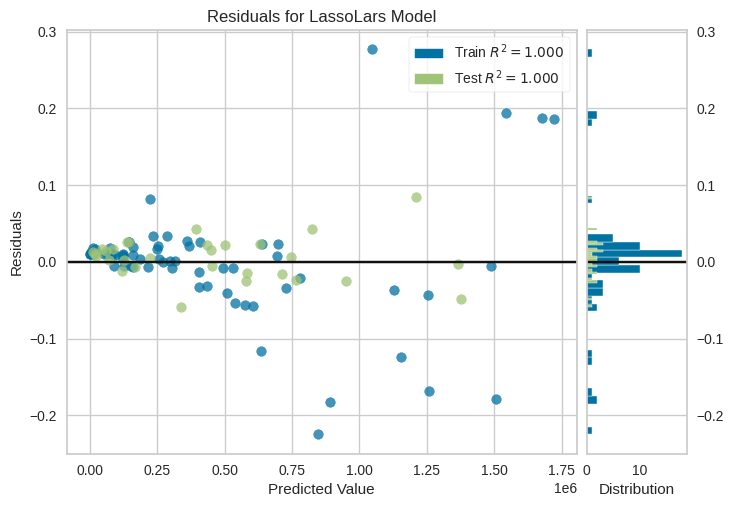

In [45]:
plot_model(tuned_llar_model)

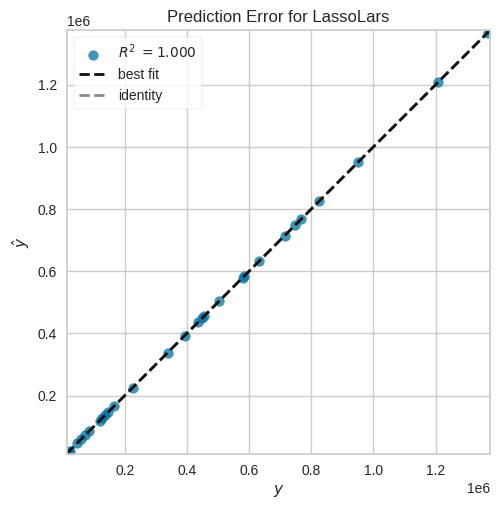

In [46]:
plot_model(tuned_llar_model, plot="error")

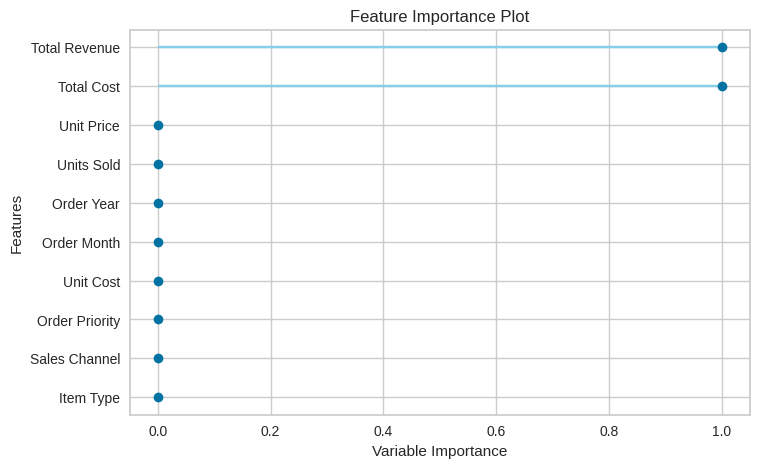

In [47]:
plot_model(tuned_llar_model,plot='feature')

In [48]:
predict_model(tuned_llar_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Least Angle Regression,0.0213,0.0008,0.0279,1.0000,0.0000,0.0000


,Item Type,Sales Channel,Order Priority,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Order Month,Order Year,Total Profit,prediction_label
61,0,1,2,4750,255.279999,159.419998,1.212580e+06,7.572450e+05,6,2013,4.553350e+05,4.553350e+05
33,6,0,1,8250,668.270020,502.540009,5.513228e+06,4.145955e+06,1,2015,1.367272e+06,1.367272e+06
93,4,1,1,7910,437.200012,263.329987,3.458252e+06,2.082940e+06,11,2010,1.375312e+06,1.375312e+06
90,8,0,1,948,651.210022,524.960022,6.173471e+05,4.976621e+05,12,2016,1.196850e+05,1.196850e+05
45,2,0,1,962,205.699997,117.110001,1.978834e+05,1.126598e+05,3,2016,8.522358e+04,8.522359e+04
86,1,0,0,8829,47.450001,31.790001,4.189361e+05,2.806739e+05,1,2011,1.382621e+05,1.382622e+05
0,0,0,1,9925,255.279999,159.419998,2.533654e+06,1.582244e+06,5,2010,9.514105e+05,9.514105e+05
60,2,0,1,682,205.699997,117.110001,1.402874e+05,7.986902e+04,6,2013,6.041838e+04,6.041839e+04
3,5,1,0,8102,9.330000,6.920000,7.559166e+04,5.606584e+04,6,2014,1.952582e+04,1.952583e+04
80,6,0,2,4513,668.270020,502.540009,3.015902e+06,2.267963e+06,10,2012,7.479395e+05,7.479395e+05


## **Implementing Linear Regression**

In [49]:
X = df[['Item Type', 'Sales Channel', 'Order Priority', 'Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Order Month', 'Order Year']]
y = df['Total Profit']

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [52]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [56]:
mse = cross_val_score(regression,X_train,y_train,scoring="neg_mean_squared_error",cv=5)
np.mean(mse)

-7.408812450475779e-19

In [57]:
reg_pred = regression.predict(X_test)
reg_pred

array([ 225246.9 ,  436446.25,  632512.5 ,   85223.58,  435499.2 ,
        503358.75,  122686.5 ,  747939.49,    7828.12,  951410.5 ,
        634745.9 , 1505888.07,  766835.04, 1367272.5 ,  119685.  ,
        639077.5 ,  146875.14,  235601.16,  606834.72,   53252.5 ])

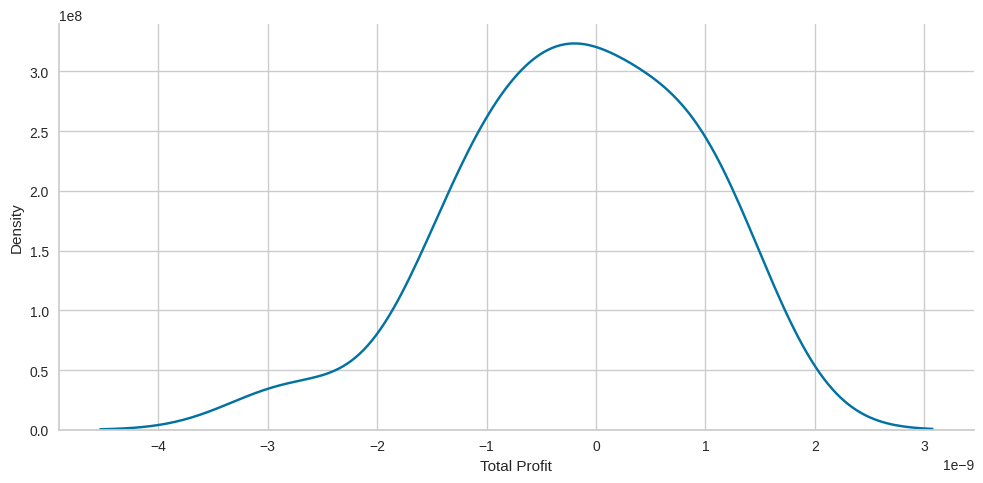

In [58]:
sns.displot(reg_pred - y_test,kind='kde', height=5, aspect=2)

In [59]:
from sklearn.metrics import r2_score
score = r2_score(reg_pred,y_test)
accuracy_pct = score * 100
print("Accuracy: {:.2f}%".format(accuracy_pct))

Accuracy: 100.00%


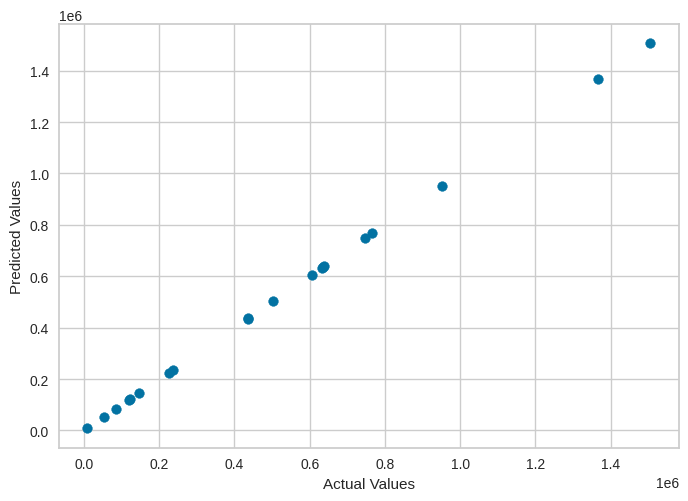

In [60]:
plt.scatter(y_test, reg_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [62]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, reg_pred)
rmse = np.sqrt(mse)
print('MSE:', mse)
print('RMSE:', rmse)

MSE: 1.0898412695164316e-18
RMSE: 1.0439546300086184e-09


In [65]:
import pickle
filename = 'tuned_llar_model.pkl'
pickle.dump(tuned_llar_model, open(filename, 'wb'))
